<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [POLR1] - Complexity Syndrome
<!-- DESC --> Illustration of the problem of complexity with the polynomial regression
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Visualizing and understanding under and overfitting
 
## What we're going to do :

We are looking for a polynomial function to approximate the observed series :  
$ y = a_n\cdot x^n + \dots + a_i\cdot x^i + \dots + a_1\cdot x + b $  


## Step 1 - Import and init

In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init()


FIDLE 2020 - Practical Work Module
Version              : 0.6 DEV
Run time             : Tuesday 8 December 2020, 19:00:19
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf
Datasets dir         : /home/pjluc/datasets/fidle
Update keras cache   : False


## Step 2 - Preparation of learning data :

Nombre de points : 100  a=[-0.82698844  1.9933617   0.2683679  -0.36711075 -1.07733898  0.57522796
  0.60749222] deg=7 bruit=2000


#### Before normalization :


Données d'aprentissage brute :
(100 points visibles sur 100)


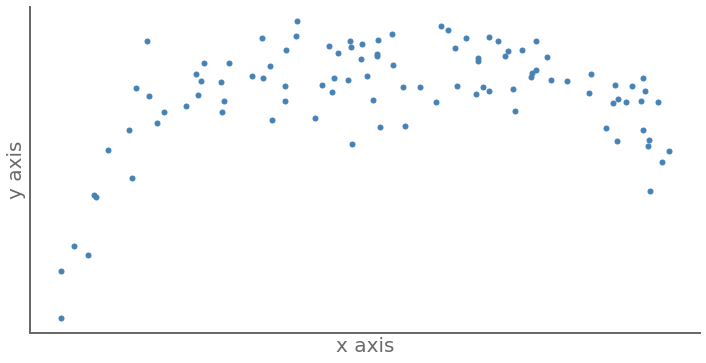

X        :      mean=     +0.3498  std=     +2.7944    min=     -4.9807    max=     +4.8482
Y        :      mean=  -1401.6182  std=  +3932.3644    min= -18119.6654    max=  +4041.4102


#### After normalization :


Données d'aprentissage normalisées :
(100 points visibles sur 100)


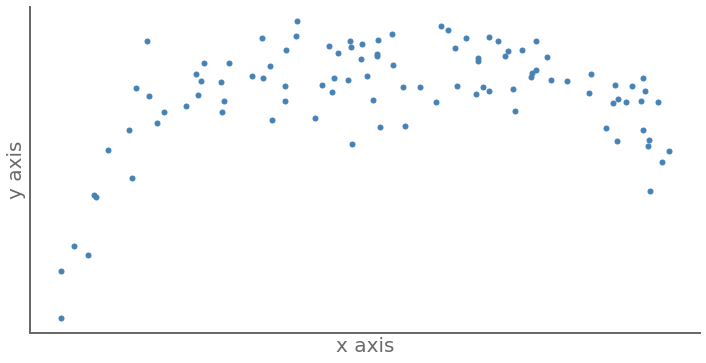

X_norm   :      mean=     -0.0000  std=     +1.0000    min=     -1.9076    max=     +1.6098
Y_norm   :      mean=     -0.0000  std=     +1.0000    min=     -4.2514    max=     +1.3842


In [2]:
# ---- Parameters

n         = 100

xob_min   = -5
xob_max   = 5

deg       =  7
a_min     = -2
a_max     =  2

noise     =  2000

# ---- Train data
#      X,Y              : data
#      X_norm,Y_norm    : normalized data

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

a = np.random.uniform(a_min,a_max, (deg,))
fy = np.poly1d( a )

Y = fy(X) + N

# ---- Data normalization
#
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# ---- Data visualization

width = 12
height = 6
nb_viz = min(2000,n)

def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))


print("Nombre de points : {}  a={} deg={} bruit={}".format(n,a,deg,noise))

pwk.display_md('#### Before normalization :')
print("\nDonnées d'aprentissage brute :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

pwk.display_md('#### After normalization :')
print("\nDonnées d'aprentissage normalisées :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


## Step 3 - Polynomial regression with NumPy
### 3.1 - Underfitting

In [3]:
def draw_reg(X_norm, Y_norm, x_hat,fy_hat, size):
    plt.figure(figsize=size)
    plt.plot(X_norm, Y_norm, '.')

    x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

    plt.plot(x_hat, fy_hat(x_hat))
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.show()

Nombre de degrés : 1 a_hat=[ 2.69624671e-01 -7.26345251e-18]


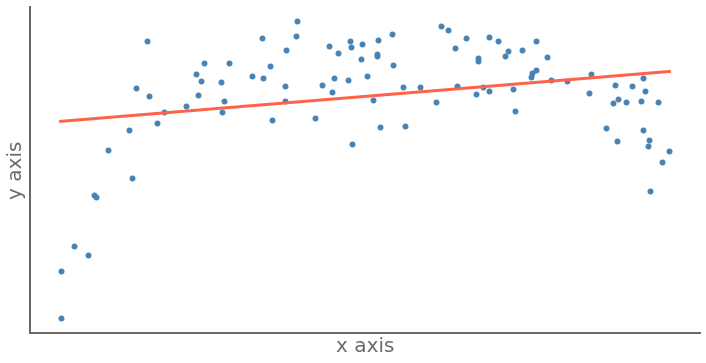

In [4]:
reg_deg=1

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

### 3.2 - Good fitting

Nombre de degrés : 5 a_hat=[ 0.12123885 -0.31817727 -0.38662953  0.21870647  0.26835207  0.43864744]


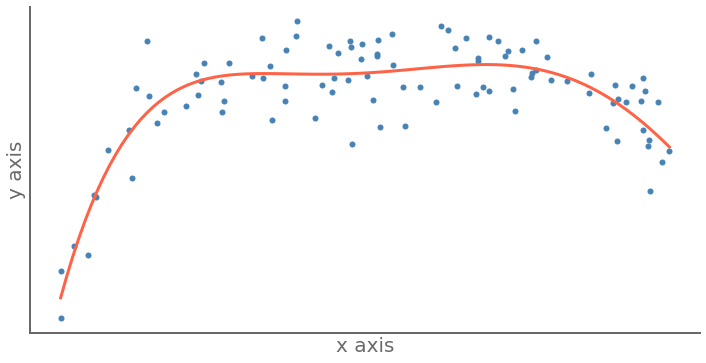

In [5]:
reg_deg=5

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

### 3.3 - Overfitting

Nombre de degrés : 24 a_hat=[ 1.77946597e+00  5.59202931e+00 -2.49447122e+01 -8.78563147e+01
  1.47460365e+02  6.01647737e+02 -4.74556999e+02 -2.35647500e+03
  8.88513638e+02  5.82214477e+03 -9.32442765e+02 -9.43875790e+03
  4.05598595e+02  1.01198434e+04  1.68176771e+02 -7.05469722e+03
 -2.94900436e+02  3.05652248e+03  1.47854111e+02 -7.53488480e+02
 -3.74009399e+01  8.87421773e+01  5.00118076e+00 -3.15113789e+00
  2.57365698e-01]


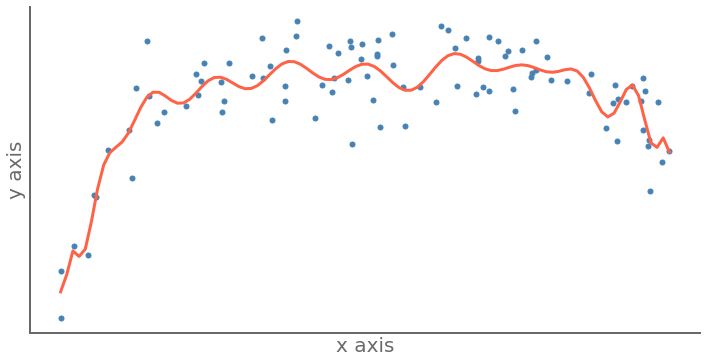

In [6]:
reg_deg=24

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )

print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))
draw_reg(X_norm[:nb_viz],Y_norm[:nb_viz], X_norm,fy_hat, (width,height))

In [7]:
pwk.end()

End time is : Tuesday 8 December 2020, 19:00:20
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>